# 처리/분석 3강 판다스

In [1]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')

In [2]:
titanic.sort_values(by=['Pclass','Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [3]:
titanic['Age'].mean()

29.69911764705882

In [5]:
titanic[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

### 카테고리별로 그룹화된 통계

In [6]:
titanic[['Sex','Age']].groupby('Sex').mean()

,Age
Sex,
female,27.915709
male,30.726645


### 성별 및 승객 등급 조합의 평균 탑승권 요금은?

In [16]:
titanic.groupby(['Sex','Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

### 각 등급의 승객 수는?

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# plot 그리기

### 데이터 정의 (Dic to DataFrame)

In [23]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'name':['Kim', "Lee", 'Park','Choi','Hong','Chung','Jang'],
    'age':[22,26,78,17,46,32,21],
    'city':['Seoul','Busan','Seoul','Busan','Seoul','Daejun','Daejun'],
    'children':[2,3,0,1,3,4,3],
    'pets':[0,1,0,2,2,0,3]
}
df = pd.DataFrame(data)
df

,name,age,city,children,pets
0,Kim,22,Seoul,2,0
1,Lee,26,Busan,3,1
2,Park,78,Seoul,0,0
3,Choi,17,Busan,1,2
4,Hong,46,Seoul,3,2
5,Chung,32,Daejun,4,0
6,Jang,21,Daejun,3,3


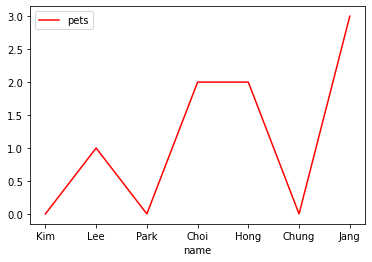

In [29]:
# plt.plot(df['name'], df['pets'], color='red')
df.plot(kind='line', x='name', y='pets', color='red')
plt.show()

### 그래프 겹쳐 그리기

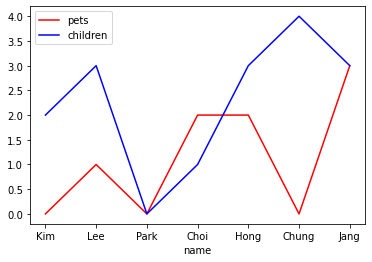

In [34]:
ax = plt.gca()
df.plot(kind='line', x='name', y='pets', color='red', ax=ax)
df.plot(kind='line', x='name', y='children', color='blue', ax=ax)
plt.show()

### bar plot

[]

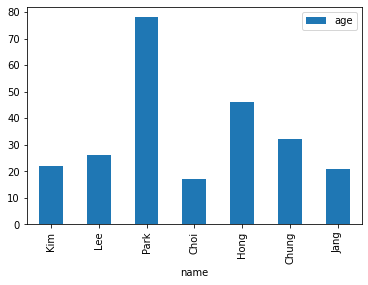

In [36]:
df.plot(kind='bar', x='name',y='age')
plt.plot()

### scatter

[]

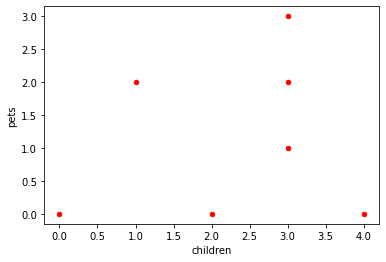

In [39]:
df.plot(kind='scatter', x='children', y='pets', color='red')
plt.plot()

### 그룹핑하여 그리기

[]

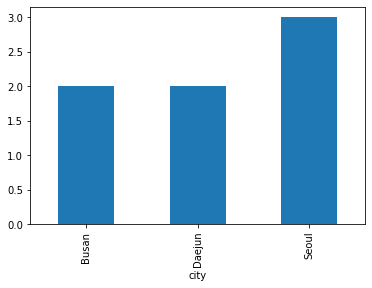

In [44]:
df.groupby('city')['name'].nunique().plot(kind='bar')
plt.plot()

### histogram

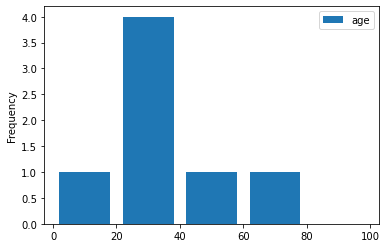

In [48]:
df[['age']].plot(kind='hist', bins=[0,20,40,60,80,100], rwidth=0.8)
plt.show()

# 피벗테이블

### 사용 데이터

In [51]:
titanic.drop(['PassengerId', 'Ticket', 'Name'], inplace=True, axis=1) #inplace: 원본데이터에 적용, axis = 행방향
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [53]:
table = pd.pivot_table(data=titanic, index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


[]

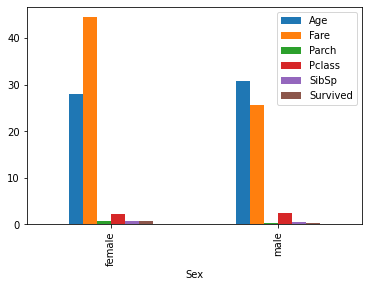

In [55]:
table.plot(kind='bar')
plt.plot()

In [58]:
table2= pd.pivot_table(data=titanic, index= ['Sex', 'Pclass'])
table2

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### 특징별로 다른 집계 함수 적용

In [60]:
import numpy as np

table = pd.pivot_table(titanic, index=['Sex', 'Pclass'],
                      aggfunc={'Age':np.mean, 'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### value 매개변수를 사용하여 특정 데이터에 대한 집계

In [64]:
table = pd.pivot_table(titanic, index=['Sex', 'Pclass'],
                      aggfunc={'Survived':np.mean})
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

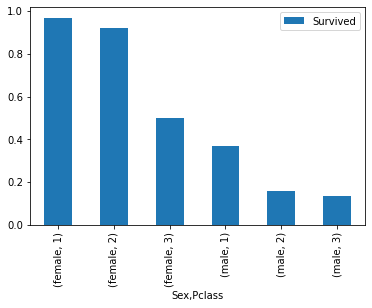

In [66]:
table.plot(kind='bar')
plt.show()

### 문제

In [72]:
table = pd.pivot_table(titanic, index=['Sex'],columns=['Pclass'], values=['Survived'], aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

[]

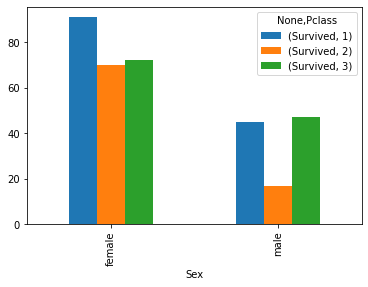

In [74]:
table.plot(kind='bar')
plt.plot()

### merge

In [77]:
df1 = pd.DataFrame({'employee':['Kim','Lee','Park','Choi'],
                   'department':['Accounting','Engineering','HR','Engineering']})


df2 = pd.DataFrame({'employee':['Kim','Lee','Park','Choi'],
                    'age':[27,34,26,29]})

df3 = pd.merge(df1, df2)
df3

,employee,department,age
0,Kim,Accounting,27
1,Lee,Engineering,34
2,Park,HR,26
3,Choi,Engineering,29


### 결손 값 삭제하기

In [86]:
import pandas as pd

df = pd.read_csv('countries.csv', index_col=0)
df.dropna(how='any', inplace=False)

,country,area,capital,population
code,,,,
KR,Korea,98480,Seoul,48422644
US,USA,9629091,Washington,310232863
JP,Japan,377835,Tokyo,127288000
CN,China,9596960,Beijing,1330044000
RU,Russia,17100000,Moscow,140702000


In [83]:
df_0 = df.fillna(0)
df_0

,country,area,capital,population
code,,,,
KR,Korea,98480,Seoul,48422644
US,USA,9629091,Washington,310232863
JP,Japan,377835,Tokyo,127288000
CN,China,9596960,Beijing,1330044000
RU,Russia,17100000,Moscow,140702000


### 실습

In [90]:
df = pd.DataFrame({'연도':[2015,2016,2016,2017,2017],
                  '지사':['한국','한국','미국','한국','미국'],
                  '고객수':[200,250,450,300,500]},index=['[1]','[2]','[3]','[4]','[5]'])
df

,연도,지사,고객수
[1],2015,한국,200
[2],2016,한국,250
[3],2016,미국,450
[4],2017,한국,300
[5],2017,미국,500


### 실습

In [89]:
data = {'이름':['민준','유리','재희'],
       '나이':[22,20,21],
       '성별':['남','여','남'],
       '전공':['수학','영문','경영']}

col_list = [1,2,3]

df = pd.DataFrame(data, index=col_list)
df

,이름,나이,성별,전공
1,민준,22,남,수학
2,유리,20,여,영문
3,재희,21,남,경영


# 엑셀 실습

In [97]:
df = pd.read_excel('/Users/donguri/Downloads/management.xlsx', sheet_name='Sheet1')
df['근무시간'] = df['퇴근시간'] - df['출근시간']
df['시간당 아이스크림'] = df['아이스크림 생산'] - df['근무시간']
df

,이름,시급,출근시간,퇴근시간,아이스크림 생산,근무시간,시간당 아이스크림
0,nayoung,8000,6,15,600,9,591
1,kim,15000,8,12,1800,4,1796
2,meyaon,15000,9,16,900,7,893
3,degrea,2000,10,18,400,8,392


### 정렬

In [98]:
df = df.sort_values(by=['시간당 아이스크림'], ascending=[False])
df

,이름,시급,출근시간,퇴근시간,아이스크림 생산,근무시간,시간당 아이스크림
1,kim,15000,8,12,1800,4,1796
2,meyaon,15000,9,16,900,7,893
0,nayoung,8000,6,15,600,9,591
3,degrea,2000,10,18,400,8,392


In [102]:
df = df.sort_values(by=['근무시간'], ascending=[False])
print(df)
df.to_excel('근무시간.xlsx', sheet_name='Sheet1')

        이름     시급  출근시간  퇴근시간  아이스크림 생산  근무시간  시간당 아이스크림
0  nayoung   8000     6    15       600     9        591
3   degrea   2000    10    18       400     8        392
2   meyaon  15000     9    16       900     7        893
1      kim  15000     8    12      1800     4       1796


# CSV

In [106]:
df = pd.read_csv('/Users/donguri/Downloads/LEC_03_data.csv')
df

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
3,Sato,Japan,40,Chef
4,Lee,Korea,36,Professor
5,Smith,USA,55,CEO


In [108]:
df[:3]

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer


In [109]:
df[3:5]

,Name,Country,Age,Job
3,Sato,Japan,40,Chef
4,Lee,Korea,36,Professor


In [113]:
df[4:]

,Name,Country,Age,Job
4,Lee,Korea,36,Professor
5,Smith,USA,55,CEO


### 원하는 행 뽑기

In [114]:
df.loc[[0,3]]

,Name,Country,Age,Job
0,John,USA,31,Student
3,Sato,Japan,40,Chef


In [115]:
df.loc[[1,2,5]]

,Name,Country,Age,Job
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
5,Smith,USA,55,CEO


### 문제

In [117]:
df1 = pd.read_csv('/Users/donguri/Downloads/LEC_03_data.csv')
df1

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
3,Sato,Japan,40,Chef
4,Lee,Korea,36,Professor
5,Smith,USA,55,CEO


In [119]:
# df['Country'] # Series
df.Country

0       USA
1    France
2     Korea
3     Japan
4     Korea
5       USA
Name: Country, dtype: object

In [120]:
df1[['Name','Country']]

,Name,Country
0,John,USA
1,Sabre,France
2,Kim,Korea
3,Sato,Japan
4,Lee,Korea
5,Smith,USA


In [122]:
df1[['Name','Country','Job']]

,Name,Country,Job
0,John,USA,Student
1,Sabre,France,Lawyer
2,Kim,Korea,Developer
3,Sato,Japan,Chef
4,Lee,Korea,Professor
5,Smith,USA,CEO
